Car Analysis

In [ ]:
#using the dataset, we will be finding correlations between certain car features
#this project will analyze the a dataset regarding car details

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we will create

#pd.options.mode.chained_assignment = None

#read in data

#creating a data frame using pandas

df = pd.read_csv(r'C:\Users\abhis\Downloads\cars\car_sales.csv')

In [13]:
df.head(20)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724
10,Buick,Century,91.561,12.475,Passenger,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,11/2/2011,71.181451
11,Buick,Regal,39.350,13.740,Passenger,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,9/3/2011,95.636703


In [11]:
df = df.dropna() #drops any rows that have missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Manufacturer - 0.0%
Model - 0.0%
Sales_in_thousands - 0.0%
__year_resale_value - 0.0%
Vehicle_type - 0.0%
Price_in_thousands - 0.0%
Engine_size - 0.0%
Horsepower - 0.0%
Wheelbase - 0.0%
Width - 0.0%
Length - 0.0%
Curb_weight - 0.0%
Fuel_capacity - 0.0%
Fuel_efficiency - 0.0%
Latest_Launch - 0.0%
Power_perf_factor - 0.0%


In [14]:
pd.set_option('display.max_rows', None) #allows all of the rows to be displayed

In [15]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724
10,Buick,Century,91.561,12.475,Passenger,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,11/2/2011,71.181451
11,Buick,Regal,39.350,13.740,Passenger,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,9/3/2011,95.636703


In [16]:
#Data types for columns

df.dtypes #dtypes checks the data types for each column

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [20]:
df['Horsepower'] = df['Horsepower'].astype('int64') #changed data types to clean up the columns
df['Fuel_efficiency'] = df['Fuel_efficiency'].astype('int64')

In [19]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.656858
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193,107.3,68.5,176.0,3.197,16.6,24,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193,111.4,70.9,188.0,3.472,18.5,25,4/4/2011,83.998724
10,Buick,Century,91.561,12.475,Passenger,21.975,3.1,175,109.0,72.7,194.6,3.368,17.5,25,11/2/2011,71.181451
11,Buick,Regal,39.350,13.740,Passenger,25.300,3.8,240,109.0,72.7,196.2,3.543,17.5,23,9/3/2011,95.636703


Relationships

In [21]:
#using graphs to find correlations between certain car features to find what affects the cars resale value

In [22]:
df.corr(method = 'pearson')

C:\Users\abhis\AppData\Local\Temp\ipykernel_3972\3294333281.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.275426,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.175562
__year_resale_value,-0.275426,1.000000,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.829511
Price_in_thousands,-0.251705,0.954757,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.905002
Engine_size,0.038111,0.527187,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.841005
Horsepower,-0.152538,0.773110,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.994071
Wheelbase,0.406839,-0.053685,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.200228
Width,0.177802,0.178128,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.478889
Length,0.272336,0.025390,0.182592,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465682,0.366831
Curb_weight,0.067184,0.363274,0.511400,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818819,0.597586
Fuel_capacity,0.138045,0.324796,0.406496,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808506,0.478484


C:\Users\abhis\AppData\Local\Temp\ipykernel_3972\1076559941.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method = 'pearson')


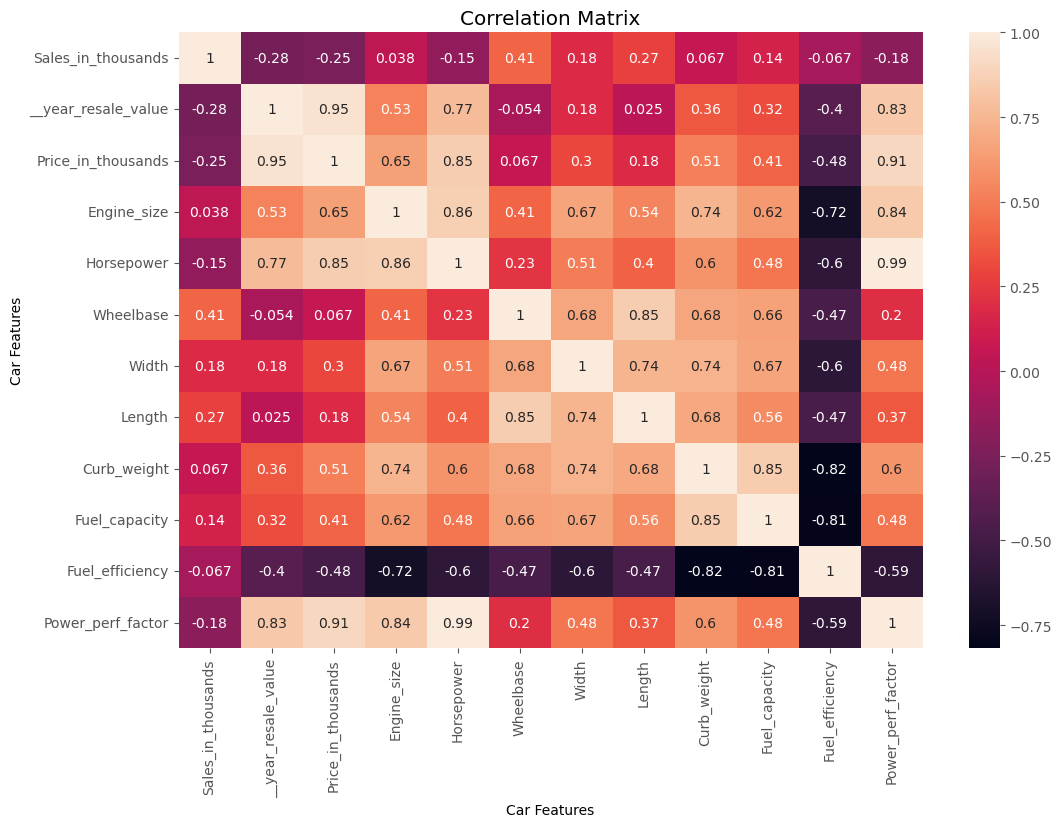

In [24]:
corr_matrix = df.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Car Features")
plt.ylabel("Car Features")
plt.show()
#this only shows features that contain numeric values (does not include car brand or type)

In [25]:
#this gives a number to all of the columns that used words (ex.company)
#allows us to compare every single column even if it is not in numbers
df_numberize = df

for column_name in df_numberize.columns:
    if(df_numberize[column_name].dtype == 'object'):
        df_numberize[column_name] = df_numberize[column_name].astype('category')
        df_numberize[column_name] = df_numberize[column_name].cat.codes
        
df_numberize

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,62,16.919,16.360,1,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,38,58.280150
1,0,107,39.384,19.875,1,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,77,91.370778
3,0,88,8.588,29.725,1,42.000,3.5,210,114.6,71.4,196.6,3.850,18.0,22,43,91.389779
4,1,4,20.397,22.255,1,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,17,62.777639
5,1,5,18.780,23.555,1,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,97,84.565105
6,1,6,1.380,39.000,1,62.000,4.2,310,113.0,74.0,198.2,3.902,23.7,21,41,134.656858
8,2,1,9.231,28.675,1,33.400,2.8,193,107.3,68.5,176.0,3.197,16.6,24,6,81.877069
9,2,3,17.527,36.125,1,38.900,2.8,193,111.4,70.9,188.0,3.472,18.5,25,62,83.998724
10,3,28,91.561,12.475,1,21.975,3.1,175,109.0,72.7,194.6,3.368,17.5,25,22,71.181451
11,3,93,39.350,13.740,1,25.300,3.8,240,109.0,72.7,196.2,3.543,17.5,23,107,95.636703


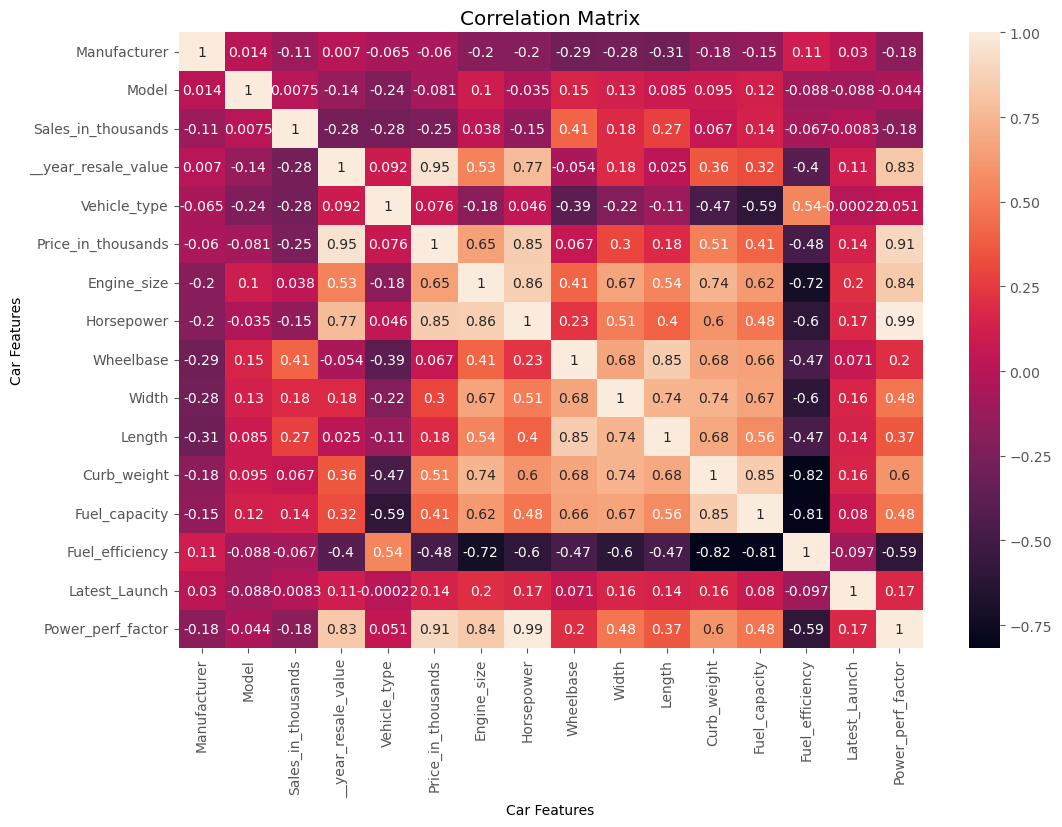

In [26]:
corr_matrix = df.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Car Features")
plt.ylabel("Car Features")
plt.show()

In [27]:
df_numberize.corr()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Manufacturer,1.000000,0.014121,-0.108854,0.007008,-0.065339,-0.059690,-0.198276,-0.204274,-0.287358,-0.278857,-0.310028,-0.176264,-0.152296,0.110984,0.030083,-0.179019
Model,0.014121,1.000000,0.007472,-0.135488,-0.235982,-0.080587,0.104268,-0.034658,0.148159,0.131421,0.085267,0.095054,0.123186,-0.087907,-0.088333,-0.043825
Sales_in_thousands,-0.108854,0.007472,1.000000,-0.275426,-0.278774,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.008326,-0.175562
__year_resale_value,0.007008,-0.135488,-0.275426,1.000000,0.091679,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.110824,0.829511
Vehicle_type,-0.065339,-0.235982,-0.278774,0.091679,1.000000,0.076303,-0.182515,0.045867,-0.385062,-0.220744,-0.109779,-0.469247,-0.586927,0.539249,-0.000217,0.051096
Price_in_thousands,-0.059690,-0.080587,-0.251705,0.954757,0.076303,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.140502,0.905002
Engine_size,-0.198276,0.104268,0.038111,0.527187,-0.182515,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.197431,0.841005
Horsepower,-0.204274,-0.034658,-0.152538,0.773110,0.045867,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.173796,0.994071
Wheelbase,-0.287358,0.148159,0.406839,-0.053685,-0.385062,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.071171,0.200228
Width,-0.278857,0.131421,0.177802,0.178128,-0.220744,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.159345,0.478889


In [28]:
correlation_mat = df_numberize.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

Fuel_efficiency      Curb_weight           -0.818819
Curb_weight          Fuel_efficiency       -0.818819
Fuel_efficiency      Fuel_capacity         -0.808506
Fuel_capacity        Fuel_efficiency       -0.808506
Fuel_efficiency      Engine_size           -0.724871
Engine_size          Fuel_efficiency       -0.724871
Fuel_efficiency      Width                 -0.599604
Width                Fuel_efficiency       -0.599604
Fuel_efficiency      Horsepower            -0.595844
Horsepower           Fuel_efficiency       -0.595844
Fuel_efficiency      Power_perf_factor     -0.588427
Power_perf_factor    Fuel_efficiency       -0.588427
Fuel_capacity        Vehicle_type          -0.586927
Vehicle_type         Fuel_capacity         -0.586927
Price_in_thousands   Fuel_efficiency       -0.479539
Fuel_efficiency      Price_in_thousands    -0.479539
Wheelbase            Fuel_efficiency       -0.470455
Fuel_efficiency      Wheelbase             -0.470455
Curb_weight          Vehicle_type          -0.

In [29]:
#This data analysis allows us to find what car features have the highest correlation
#This dataset is a smaller sample but the same code can be used to find correlations in bigger datasets to find relation across different cities, countries and even the world